##***HR Analytics: Identifying Job Change Factors for Aspiring Data Scientists***

In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#ignore warning
import warnings
warnings.filterwarnings('ignore')

##Load Dataset of HR data
-This dataset designed to understand the factors that lead a person to leave current job for HR researches too.\
-By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

In [550]:
df=pd.read_csv('/content/HR Analytics Job Change Data.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [551]:
#shape of dataset
df.shape

(19158, 14)

In [552]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


## Attribute Information

- `enrollee_id`: Unique ID for candidate
- `city`: City code
- `city_development_index`: Development index of the city (scaled)
- `gender`: Gender of candidate
- `relevant_experience`: Relevant experience of candidate
- `enrolled_university`: Type of University course enrolled if any
- `education_level`: Education level of candidate
- `major_discipline`: Education major discipline of candidate
- `experience`: Candidate's total experience in years
- `company_size`: Number of employees in current employer's company
- `company_type`: Type of current employer
- `last_new_job`: Difference in years between previous job and current job
- `training_hours`: Training hours completed
- **Target Attribute:**
  - `target`: 0 – Not looking for job change, 1 – Looking for a job change

##***Exploratory Data Analysis (EDA)***

In [553]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [554]:
# Basic statistics
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [555]:
# Check for missing values
print("missing value in dataset:-")
df.isnull().sum()

missing value in dataset:-


,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


(19158, 14)


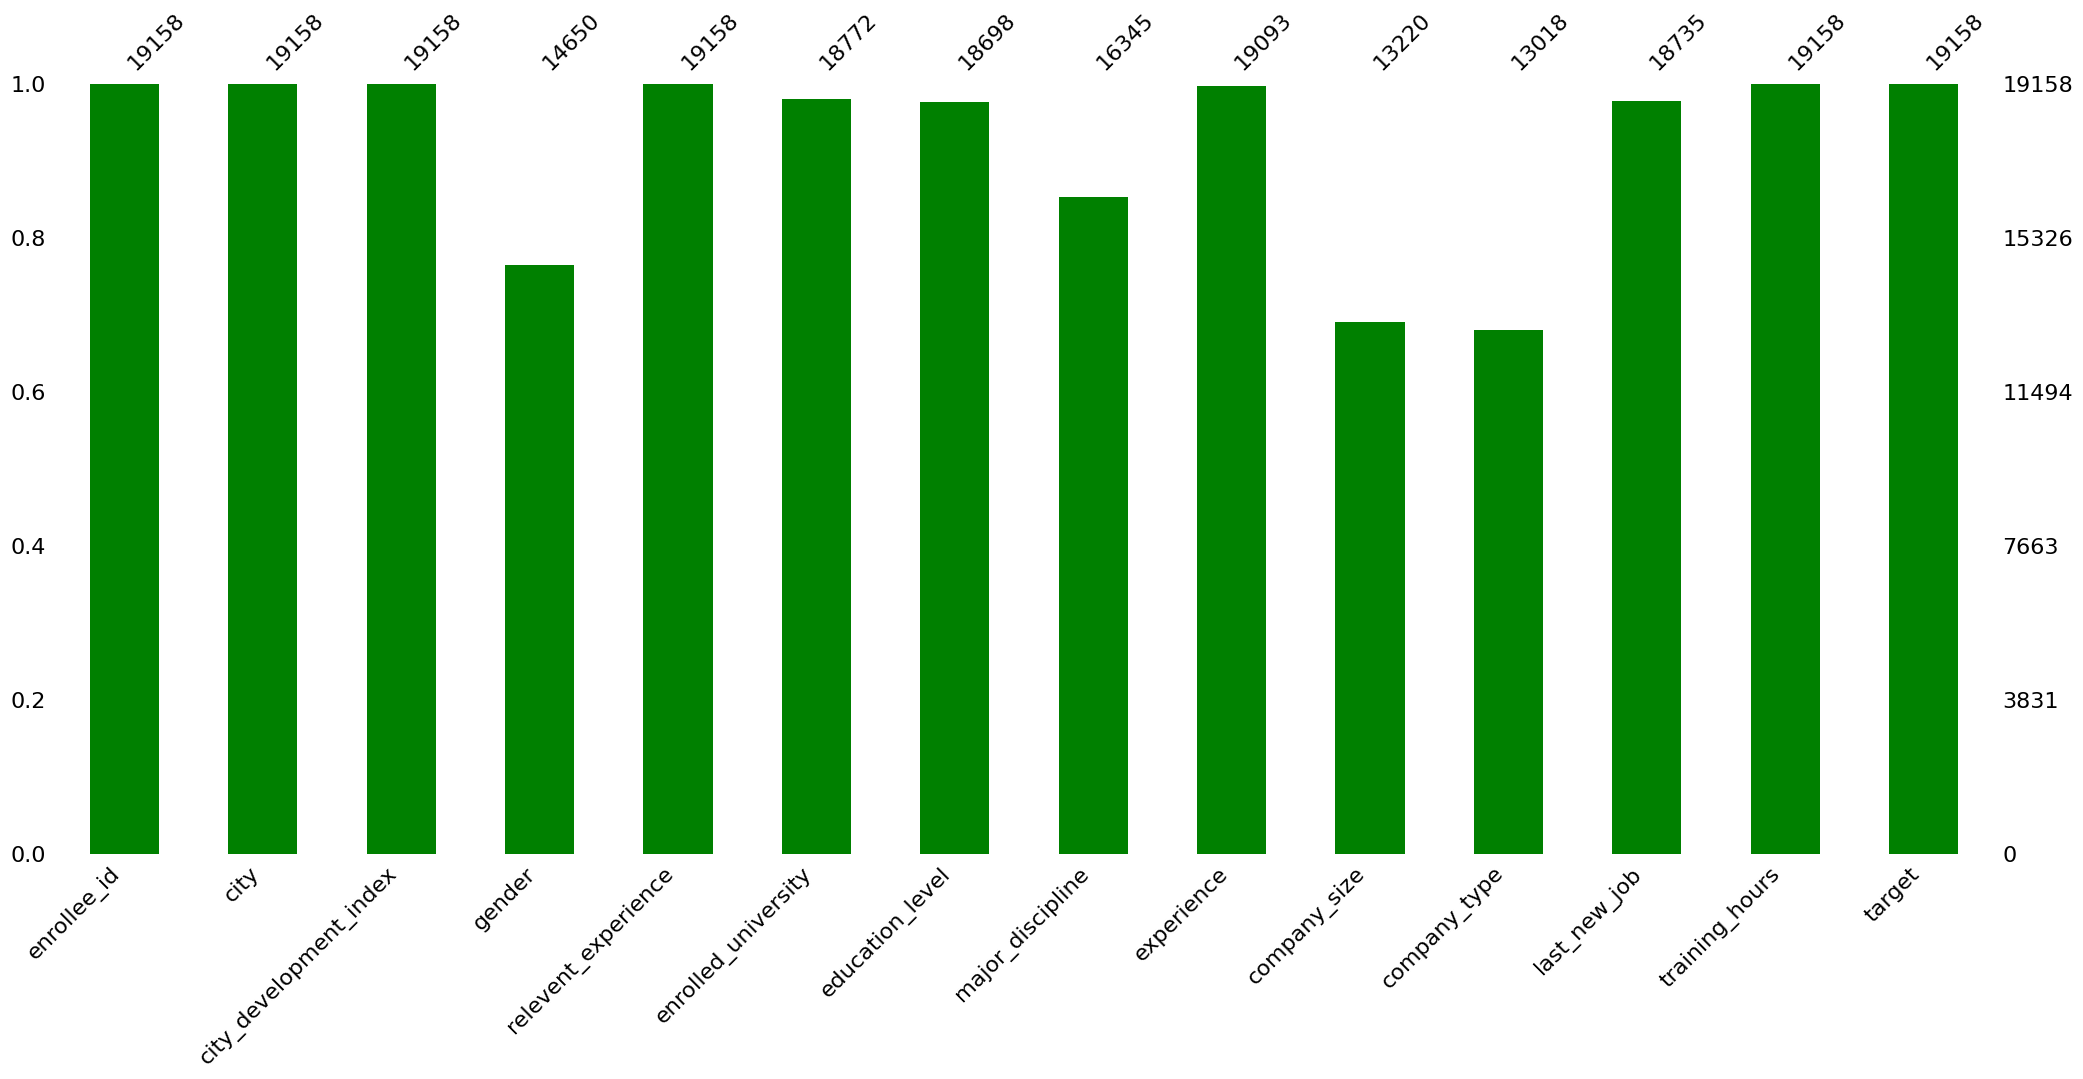

In [556]:
#visualize the missing value in dataset as graph
import missingno as msno
print(df.shape)
#missing value bar
msno.bar(df,color='green')
plt.show()

##Treating missing values

In [557]:
df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [558]:
df['gender'].value_counts()

,count
gender,
Male,13221
Female,1238
Other,191


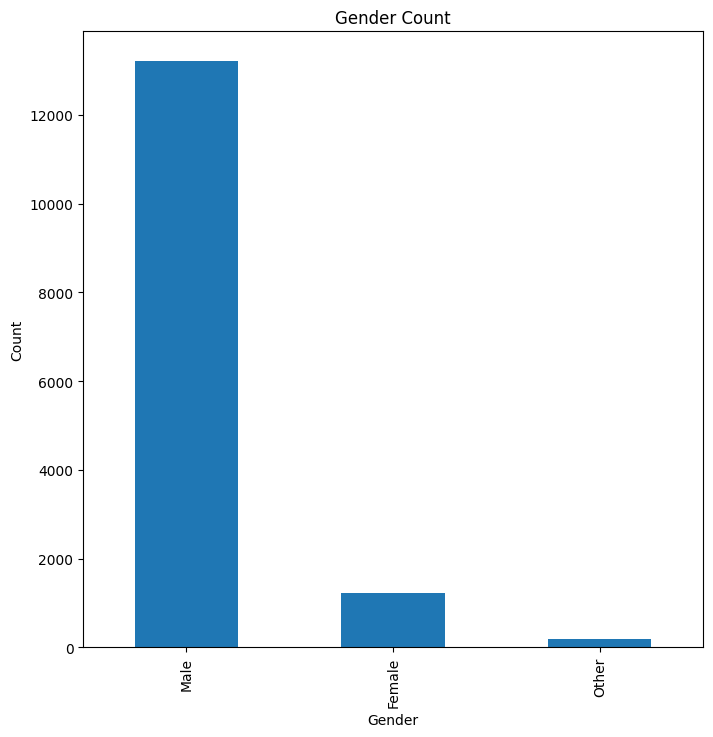

In [559]:
#gender distibution
df.gender.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

In [560]:
#treating the nan value replace by other
df['gender'].fillna('Male',inplace=True)

In [561]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

Text(0, 0.5, 'Count')

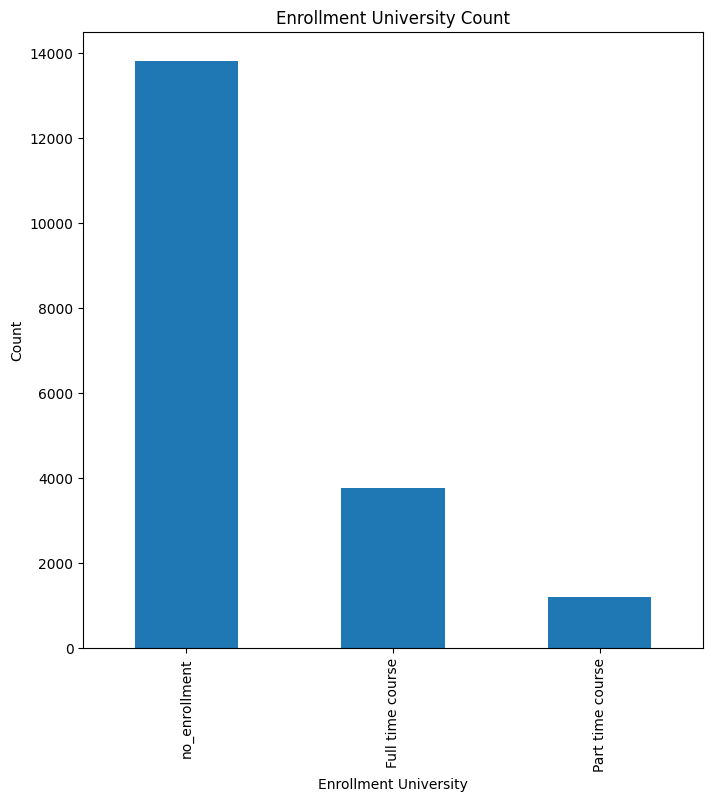

In [562]:
#enrollment university value_counts bar plot
df['enrolled_university'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Enrollment University Count')
plt.xlabel('Enrollment University')
plt.ylabel('Count')

In [563]:
#Treating the missing value in enrolled_university
df['enrolled_university'].fillna('no_enrollment',inplace=True)

In [564]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

Text(0, 0.5, 'Count')

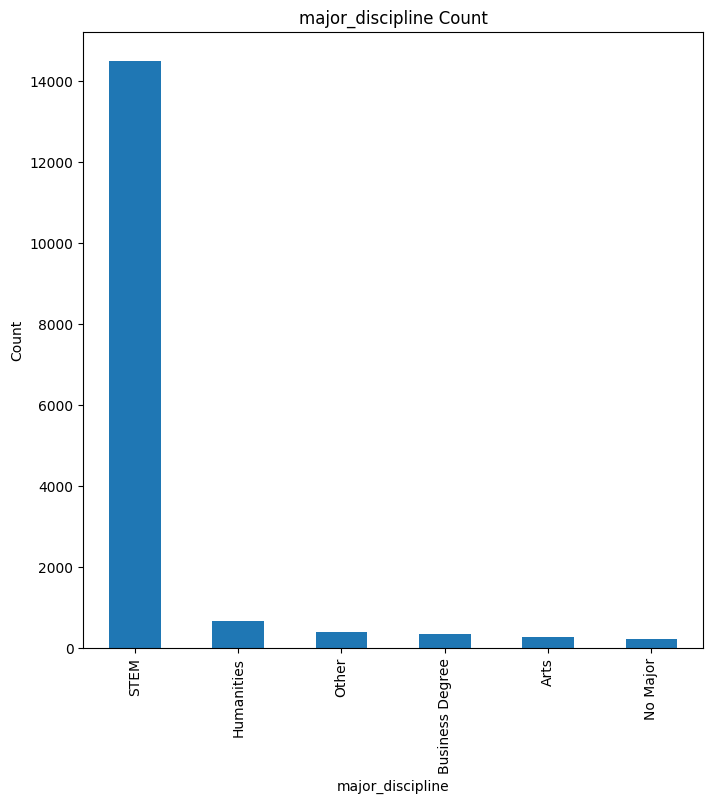

In [565]:
#major_discipline value_counts bar plot
df['major_discipline'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title('major_discipline Count')
plt.xlabel('major_discipline')
plt.ylabel('Count')

In [566]:
#Ttreating the missing value of 'major_discipline'
df['major_discipline'].fillna('STEM',inplace=True)

In [567]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [568]:
#treating the missing value of Experience
df['experience'].fillna('0',inplace=True)

In [569]:
#convert <20 to 21 and <1 to 0
df['experience'] = df['experience'].replace('<1', '0')
df['experience'] = df['experience'].replace('>20','21')

In [570]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

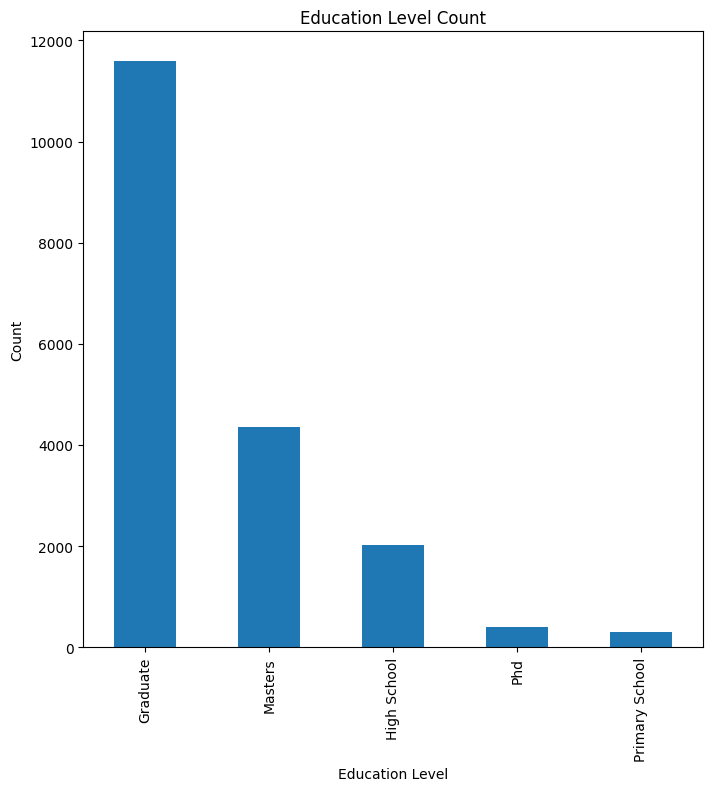

In [571]:
#fix education level
df.education_level.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Education Level Count')
plt.xlabel('Education Level')
plt.ylabel('Count');

In [572]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [573]:
#treating missing value of Education level Graduate
df['education_level'].fillna('Graduate', inplace=True)

In [574]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [575]:
#treating the missing values in 'last_new_job'
df['last_new_job'].fillna('1', inplace=True)

In [576]:
#convert the unsual values
df['last_new_job'] = df['last_new_job'].replace('>4', '5')
df['last_new_job'] = df['last_new_job'].replace('never', '0')

In [577]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [578]:
df['company_size'].value_counts()

,count
company_size,
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
5000-9999,563


In [579]:
df['company_size'].fillna('50-99', inplace=True)

In [580]:
#convert unusual values to the common trend
df['company_size'] = df['company_size'].replace('10000+', '10000-11000')
df['company_size'] = df['company_size'].replace('10/49', '10-49')
df['company_size'] = df['company_size'].replace('<10', '1-9')

In [581]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

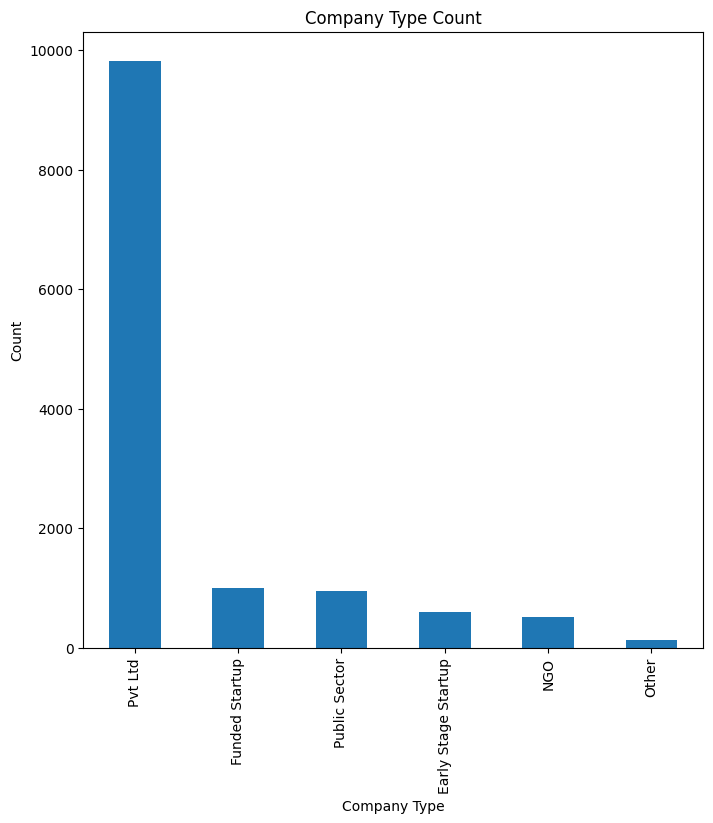

In [582]:
#fix company type
df.company_type.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Company Type Count')
plt.xlabel('Company Type')
plt.ylabel('Count');

In [583]:
#fill the highest value_count category
df['company_type'].fillna('Pvt Ltd', inplace=True)

In [584]:
df['target'].unique()

array([1., 0.])

In [585]:
#after treating the mising value check if any missing value
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0
company_size,0


In [586]:
df.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [587]:
#convert interger format in form of object change in to int
df['experience'] = df['experience'].astype(int)
df['last_new_job'] = df['last_new_job'].astype(int)

In [588]:
#check duplicate data
df.duplicated().sum()

0

In [589]:
#check the nunique dataset
df.nunique()

,0
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,8


In [590]:
#shape of dataset
df.shape

(19158, 14)

In [591]:
df.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,int64
company_size,object


In [592]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [593]:
df['target'].value_counts()

,count
target,
0.0,14381
1.0,4777


In [594]:
df['target'].unique()

array([1., 0.])

In [595]:
df['target']=df['target'].astype(int)

In [596]:
df['target'].dtypes

dtype('int64')

In [597]:
df['target'].unique()

array([1, 0])

In [598]:
#convert target: 0 – Not looking for job change, 1 – Looking for a job change
df['target'] = df['target'].map({0: 'Not looking for job change', 1: 'Looking for a job change'})

##***Visualize the dataset***

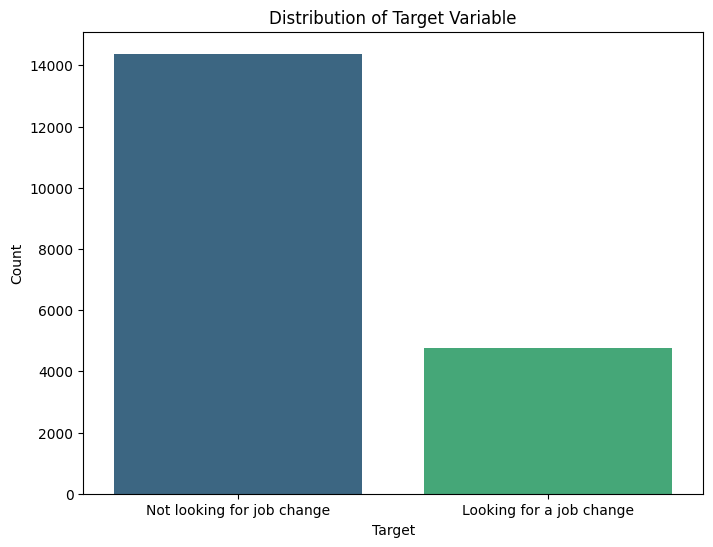

In [599]:
# Get value counts for the target variable
target_counts = df['target'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

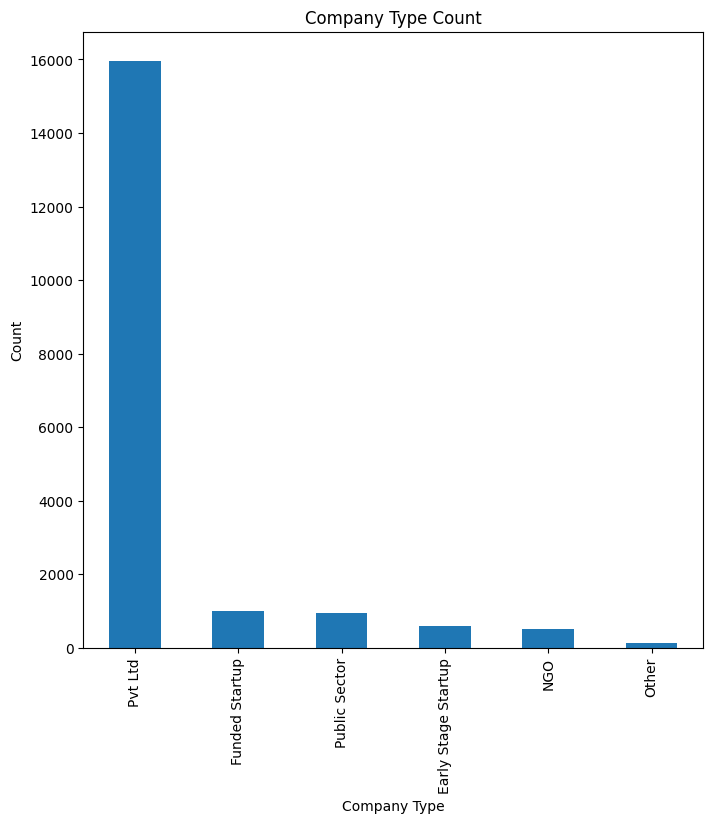

In [600]:
#fix company type
df.company_type.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Company Type Count')
plt.xlabel('Company Type')
plt.ylabel('Count');

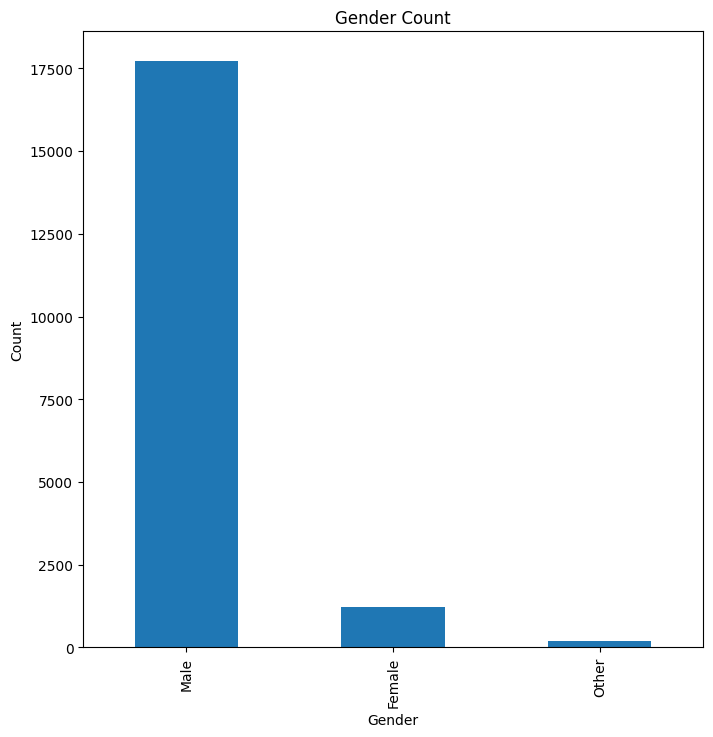

In [601]:
#gender distribution job data
df.gender.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

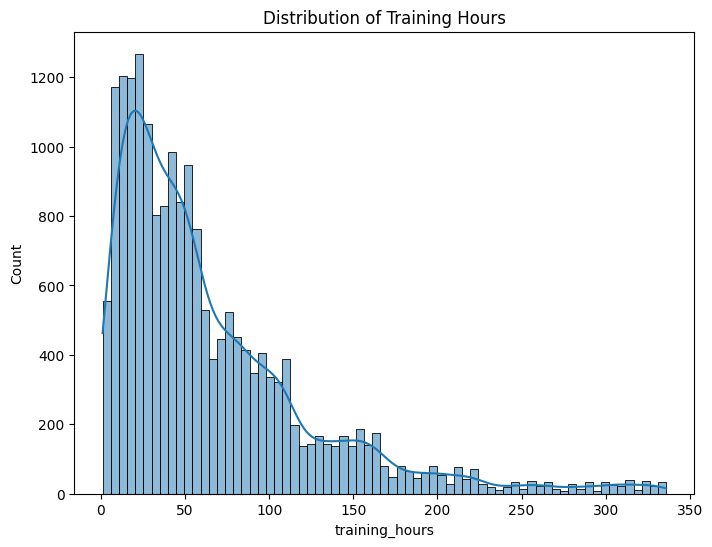

In [602]:
# Distribution of training hours
plt.figure(figsize=(8, 6))
sns.histplot(df['training_hours'], kde=True)
plt.title('Distribution of Training Hours')
plt.show()

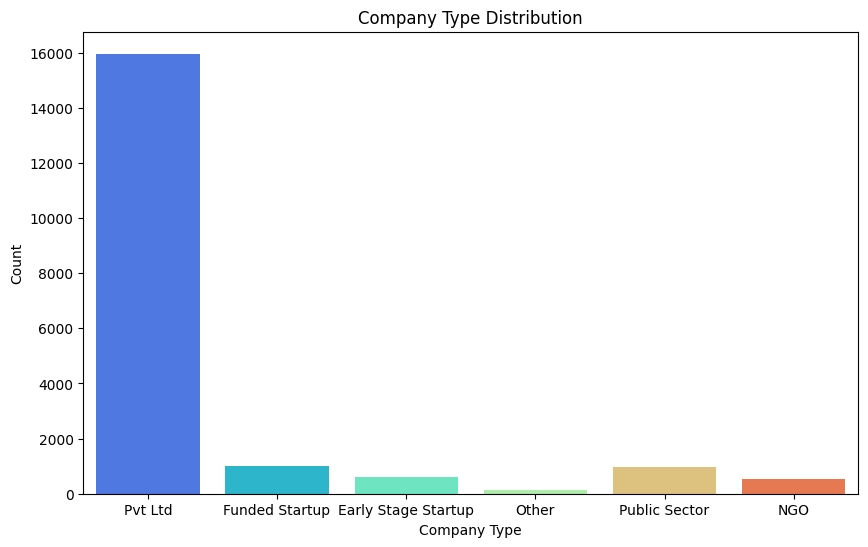

In [603]:
#company type in barchart
plt.figure(figsize=(10, 6))
sns.countplot(x='company_type', data=df,palette='rainbow')
plt.title('Company Type Distribution')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.show()

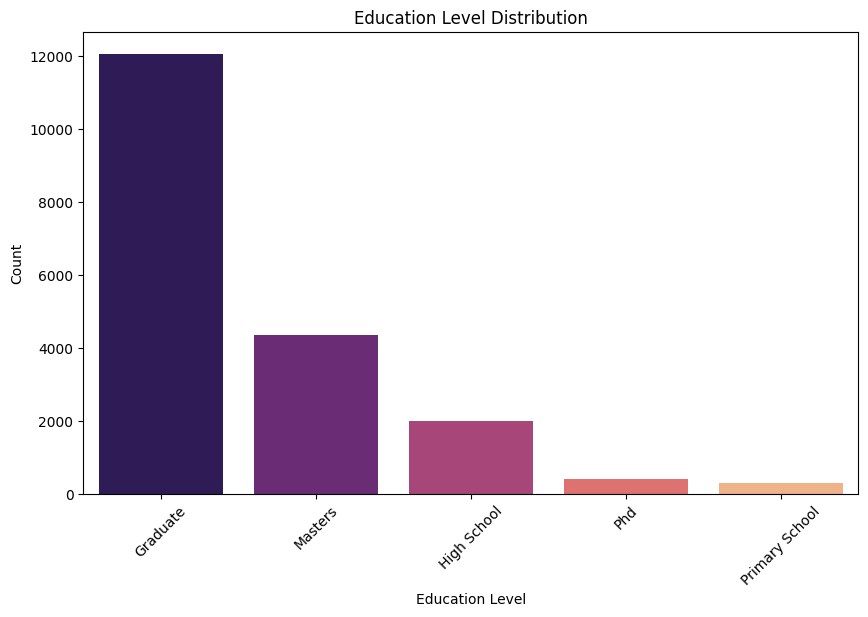

In [604]:
# Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', data=df, order=df['education_level'].value_counts().index,palette='magma')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

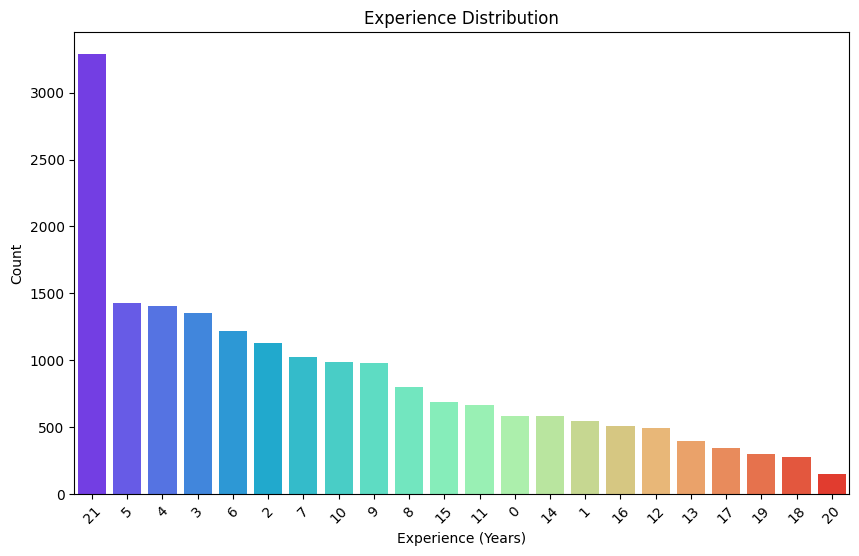

In [605]:
# Experience Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='experience', data=df, order=df['experience'].value_counts().index,palette='rainbow')
plt.title('Experience Distribution')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

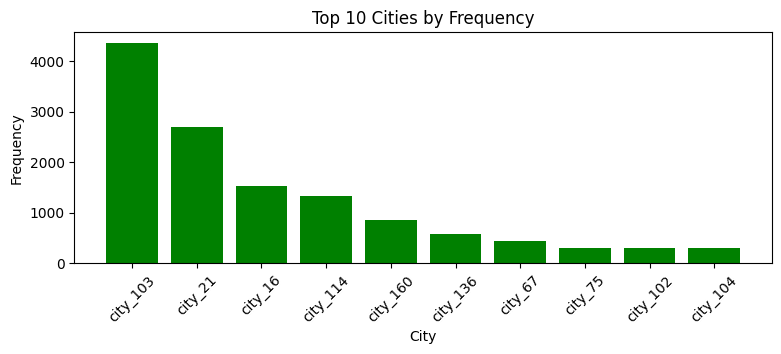

In [606]:
# top 10 city value_count in dataset
df_city = df['city'].value_counts().head(10)
city_col = df_city.values
city_index = df_city.index

plt.figure(figsize=(9, 3))
plt.bar(city_index, city_col,color='green')
plt.xlabel("City")
plt.ylabel("Frequency")
plt.title("Top 10 Cities by Frequency")
plt.xticks(rotation=45)
plt.show()

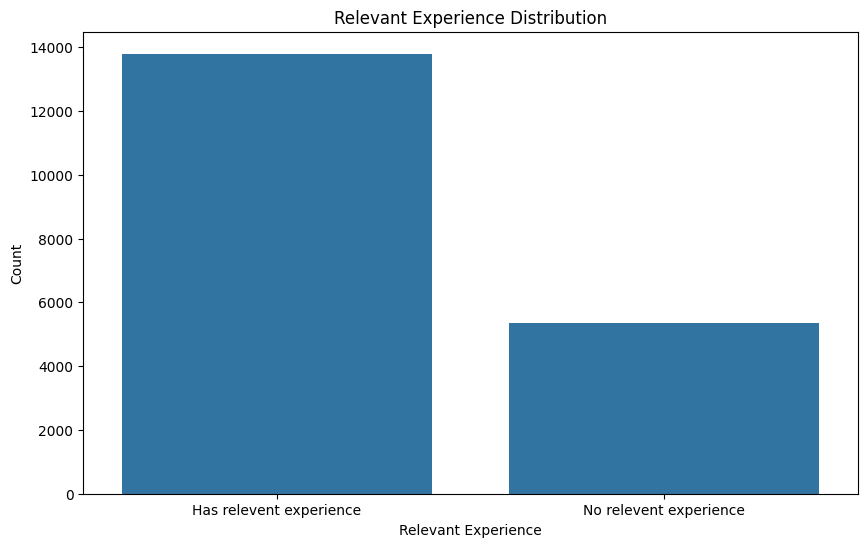

In [607]:
#compare betwen relevent experience vs other experience
plt.figure(figsize=(10, 6))
sns.countplot(x='relevent_experience', data=df)
plt.title('Relevant Experience Distribution')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.show()


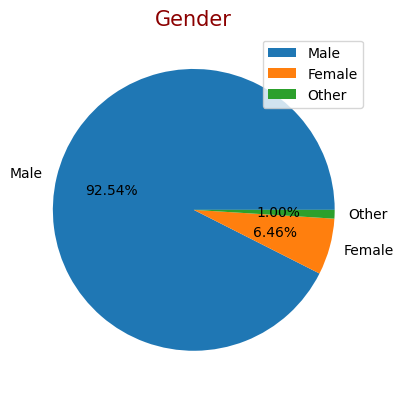

In [608]:
#gender distribution % in dataset
gender_counts = df["gender"].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.2f%%')
plt.title('Gender',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

##***ALL Feature compare with Target(Affect hiring)***

#Does education level affect on target:-

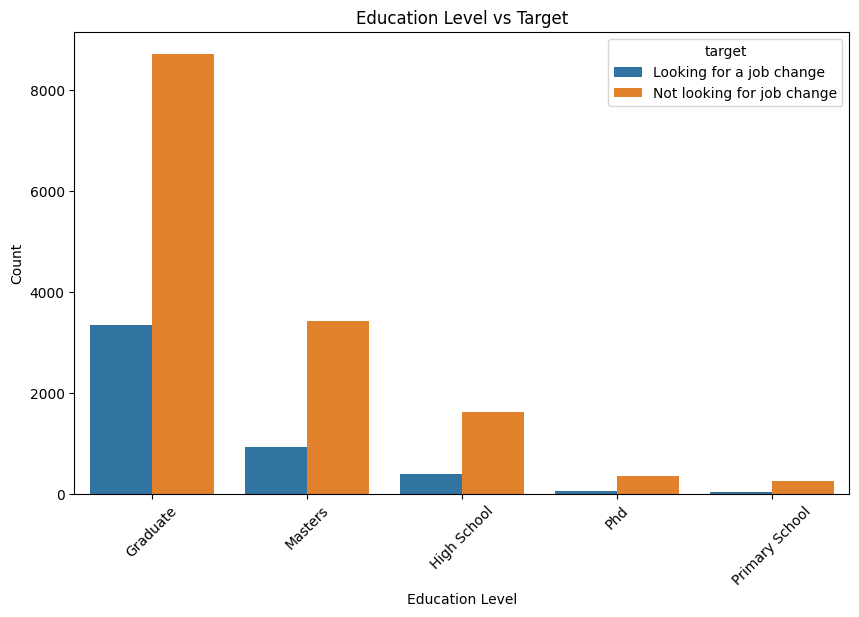

In [609]:
# Education Level vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', hue='target', data=df, order=df['education_level'].value_counts().index)
plt.title('Education Level vs Target')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Graduates tend to switch more as compared to others. To simplify things we can define 3 groups here, UnderGrads, Graduate and PostGrads

In [610]:
df.loc[(df['education_level']=='High School')|(df['education_level']=='Primary School'),'education_level' ]='UnderGrad'
df.loc[(df['education_level']=='Phd')|(df['education_level']=='Masters'),'education_level' ]='PostGrad'

In [611]:
df['education_level'].unique()

array(['Graduate', 'PostGrad', 'UnderGrad'], dtype=object)

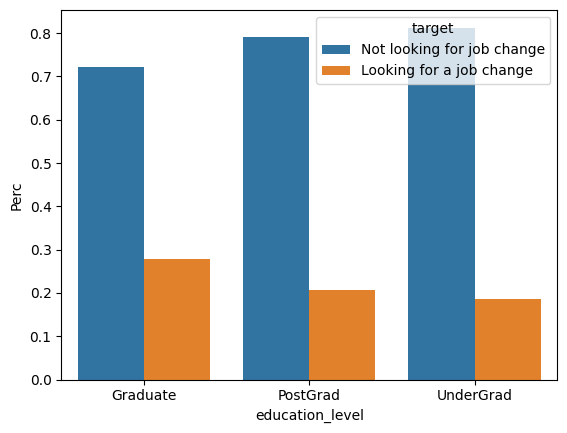

In [612]:
temp = df.groupby('education_level')['target'].value_counts(normalize=True).reset_index(name='Perc')

sns.barplot(x='education_level', y='Perc', hue='target', data=temp, dodge=True);

#Does relevent experence and no relevent experience affect on target:-

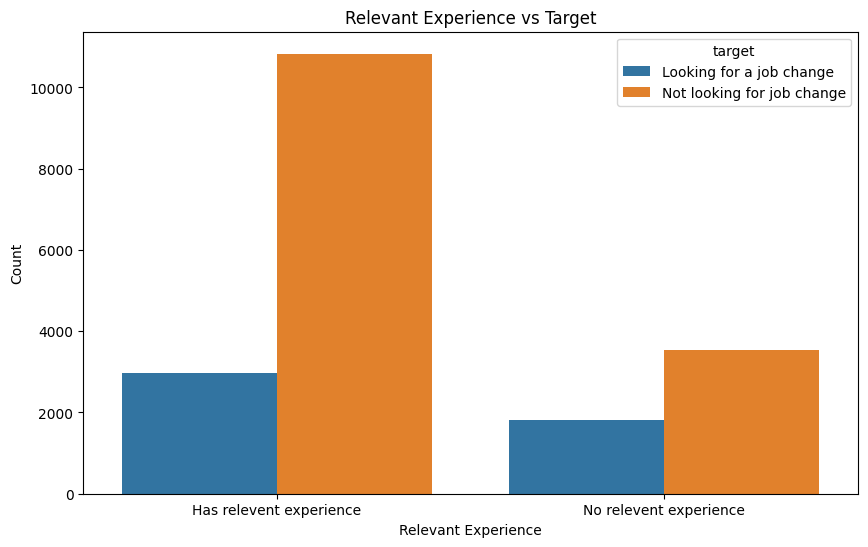

In [613]:
# Relevant Experience vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Relevant Experience vs Target')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.show()

#Does Experience year affect on hiring:-

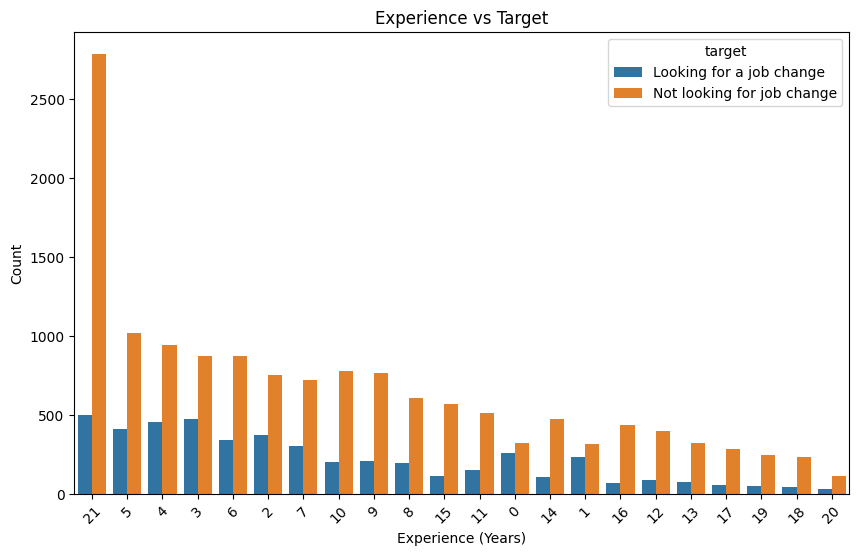

In [614]:
# Experience vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='experience', hue='target', data=df, order=df['experience'].value_counts().index)
plt.title('Experience vs Target')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Does company size affect on target:-

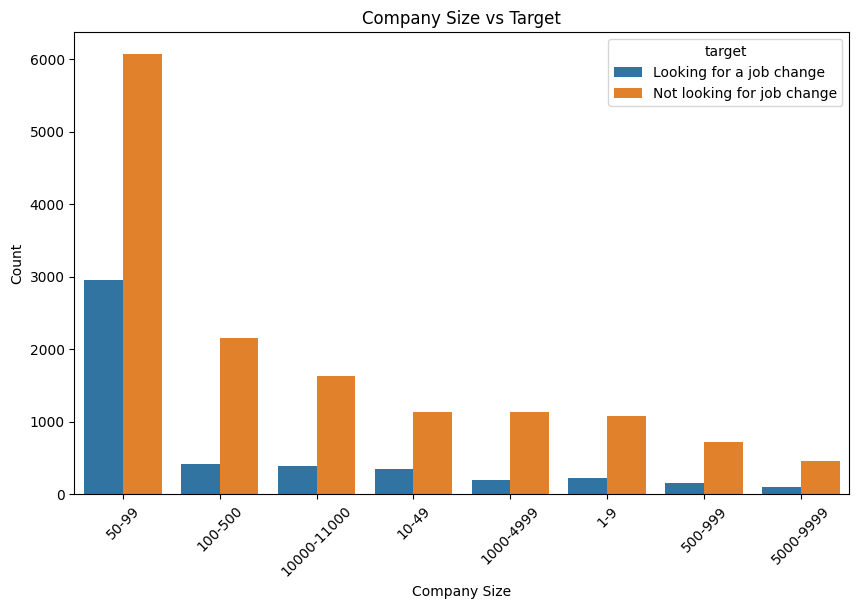

In [615]:
# Company Size vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', hue='target', data=df, order=df['company_size'].value_counts().index)
plt.title('Company Size vs Target')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Microentreprises: 1 to 9 employees.
- Small enterprises: 10 to 49 employees.
- Medium-sized enterprises: 50 to 500 employees.
- Large enterprises: 501 employees or more.

In [616]:
df.loc[(df['company_size']=='1-9'),'company_size' ]='Microentreprises'
df.loc[(df['company_size']=='10-49'),'company_size' ]='Small enterprises'
df.loc[(df['company_size']=='50-99')|(df['company_size']=='100-500'),'company_size' ]='Medium-sized enterprises'
df.loc[(df['company_size']=='500-999')|(df['company_size']=='1000-4999')|(df['company_size']=='5000-9999')|(df['company_size']=='10000-11000'),'company_size' ]='Large enterprises'

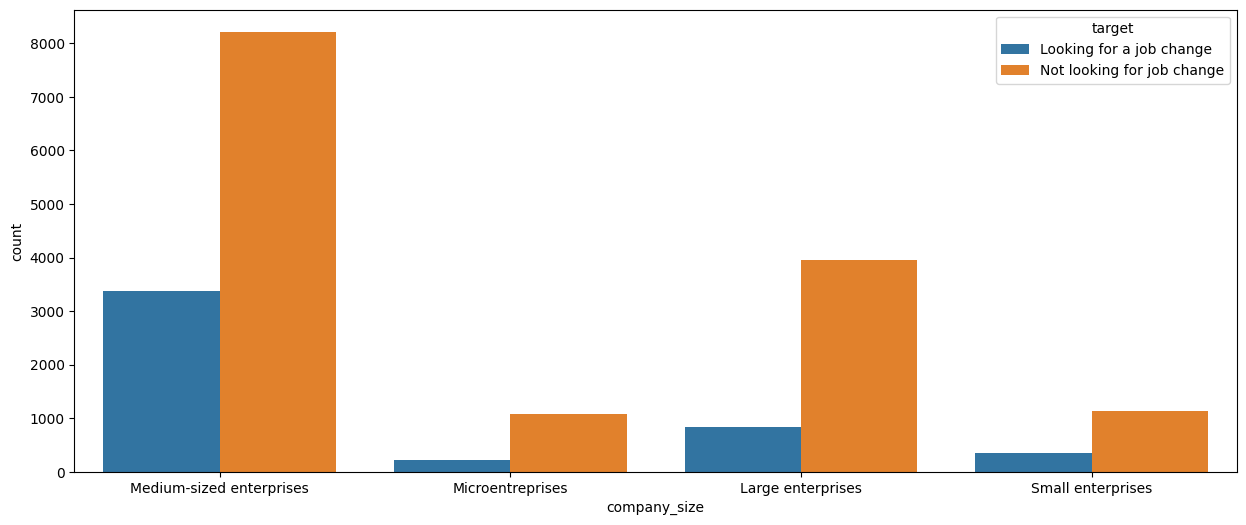

In [617]:
plt.figure(figsize=(15,6))
sns.countplot(x='company_size', hue='target', data =df)
plt.show()

In [618]:
df['company_size'].unique()

array(['Medium-sized enterprises', 'Microentreprises',
       'Large enterprises', 'Small enterprises'], dtype=object)

#Does Major Discipline affect on Target:-

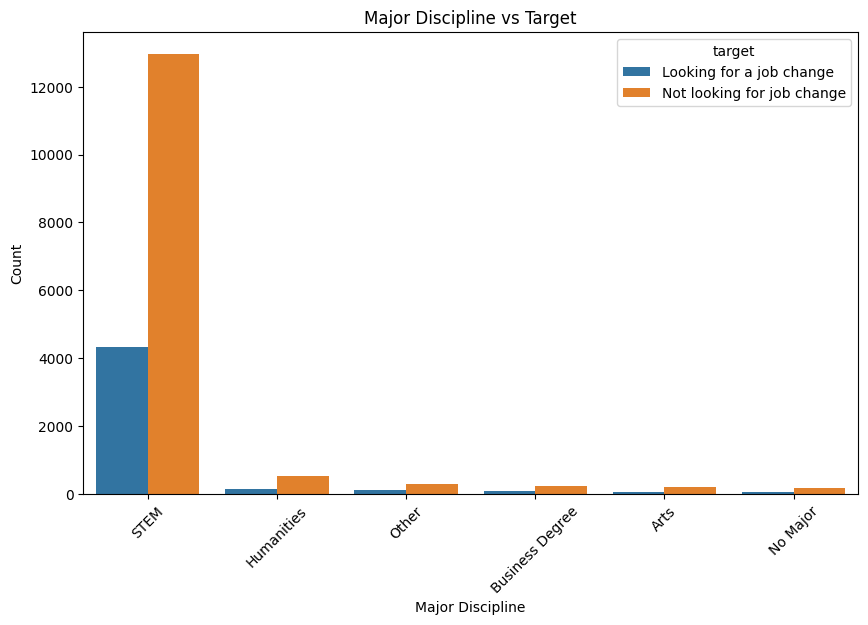

In [619]:
# Major Discipline vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='major_discipline', hue='target', data=df, order=df['major_discipline'].value_counts().index)
plt.title('Major Discipline vs Target')
plt.xlabel('Major Discipline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

It is clear that the prevailing value is 'STEM'. It means that most people have a technical education like engineering, math etc. So, let's create 2 groups to make the dataset more balanced: 'STEM' and 'Not STEM', which contains all other groups.

In [620]:
df.loc[(df['major_discipline']!='STEM'),'major_discipline' ]='Non-STEM'

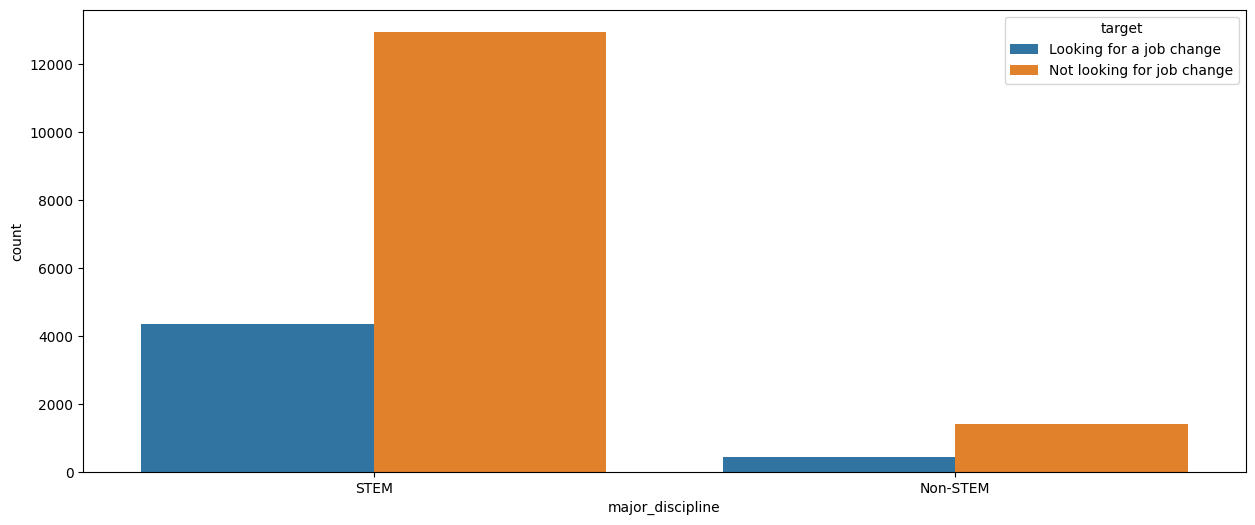

In [621]:
plt.figure(figsize=(15,6))
sns.countplot(x='major_discipline', hue='target', data =df)
plt.show()

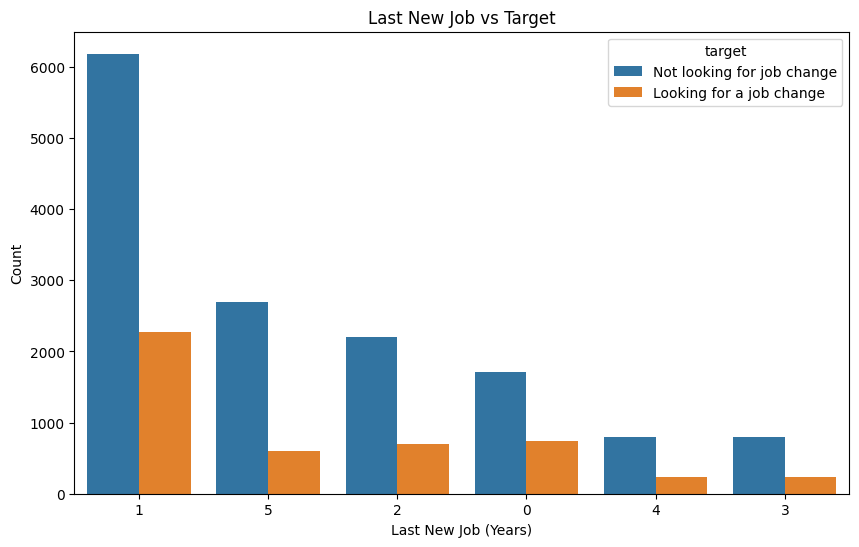

In [622]:
# Last New Job vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='last_new_job', hue='target', data=df, order=df['last_new_job'].value_counts().index)
plt.title('Last New Job vs Target')
plt.xlabel('Last New Job (Years)')
plt.ylabel('Count')
plt.show()

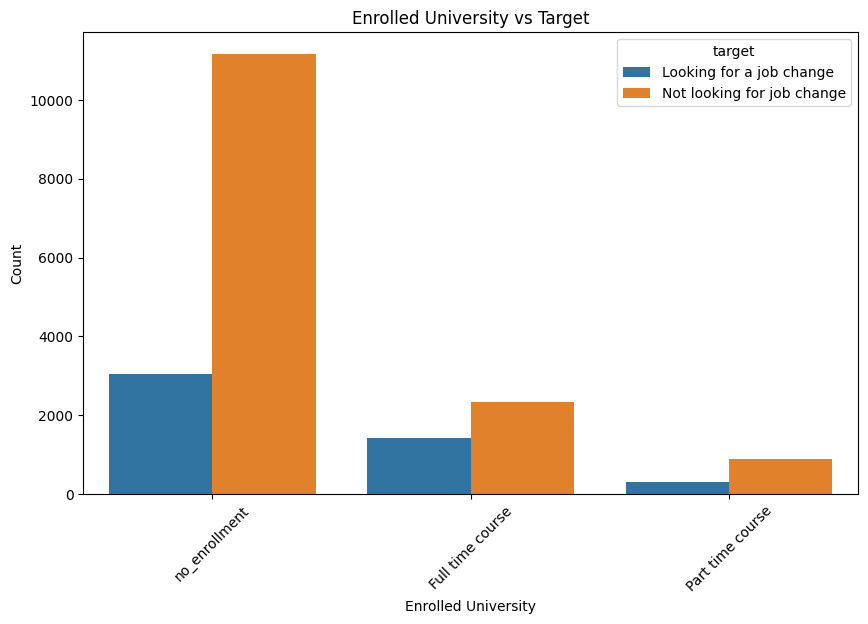

In [623]:
# Enrolled University vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='enrolled_university', hue='target', data=df, order=df['enrolled_university'].value_counts().index)
plt.title('Enrolled University vs Target')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

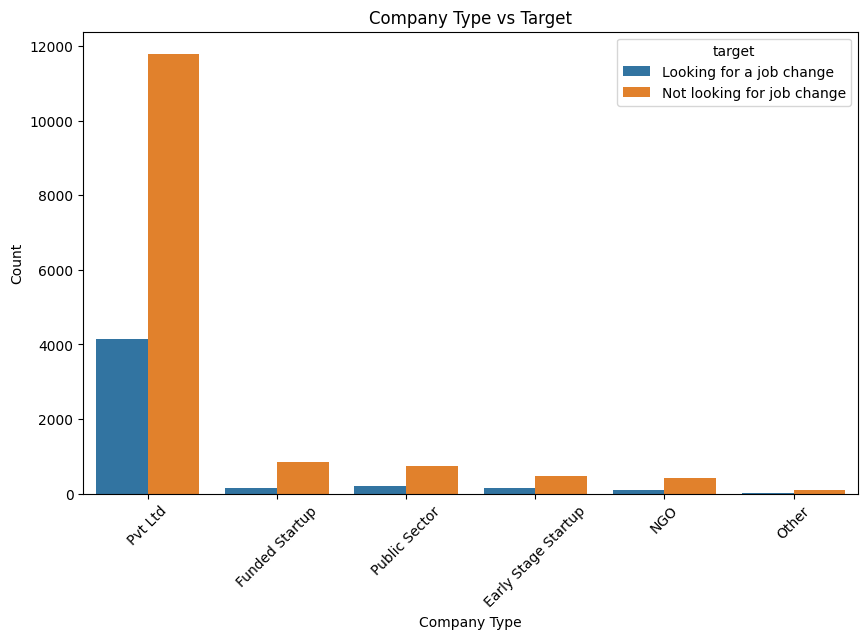

In [624]:
# Company Type vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='company_type', hue='target', data=df, order=df['company_type'].value_counts().index)
plt.title('Company Type vs Target')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Relevent experience vs no Relevent experience hiring (target)

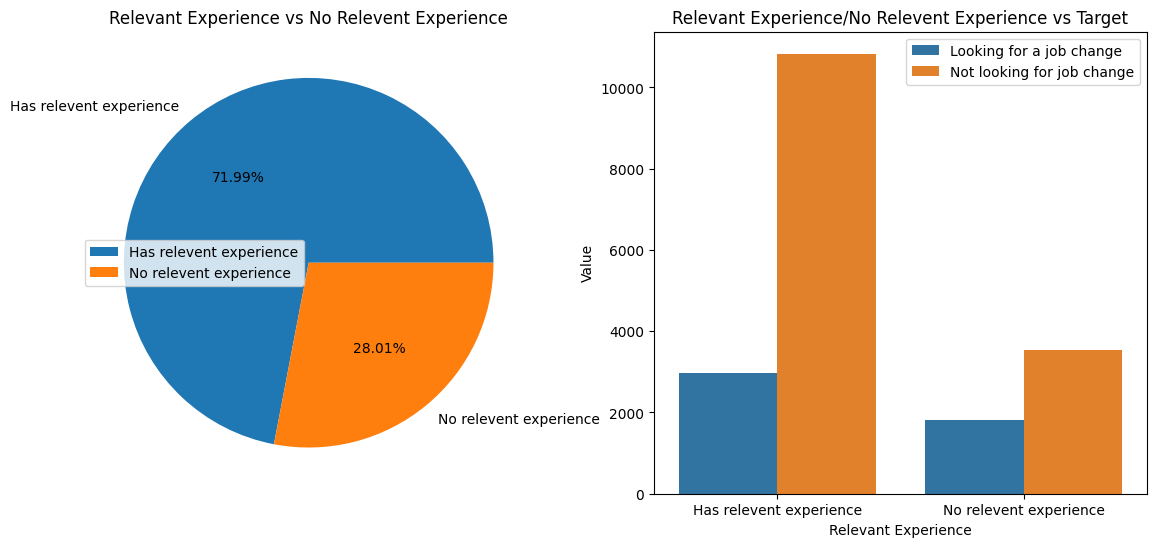

In [625]:
#compare relevent experience vs no relevent experience hiring (target)
experience = df['relevent_experience'].value_counts()
university = df['enrolled_university'].value_counts()
plt.figure(figsize=(14, 6))

# Pie chart for relevant experience distribution
plt.subplot(1, 2, 1)
plt.pie(experience.values, labels=experience.index, autopct='%1.2f%%')
plt.title('Relevant Experience vs No Relevent Experience')
plt.legend()

# Count plot for relevant experience vs target
plt.subplot(1, 2, 2)
sns.countplot(x="relevent_experience", hue="target", data=df)
plt.xlabel('Relevant Experience')
plt.ylabel('Value')
plt.title('Relevant Experience/No Relevent Experience vs Target')
plt.legend()
plt.show()

#Does university course type Affect on hiring (target)

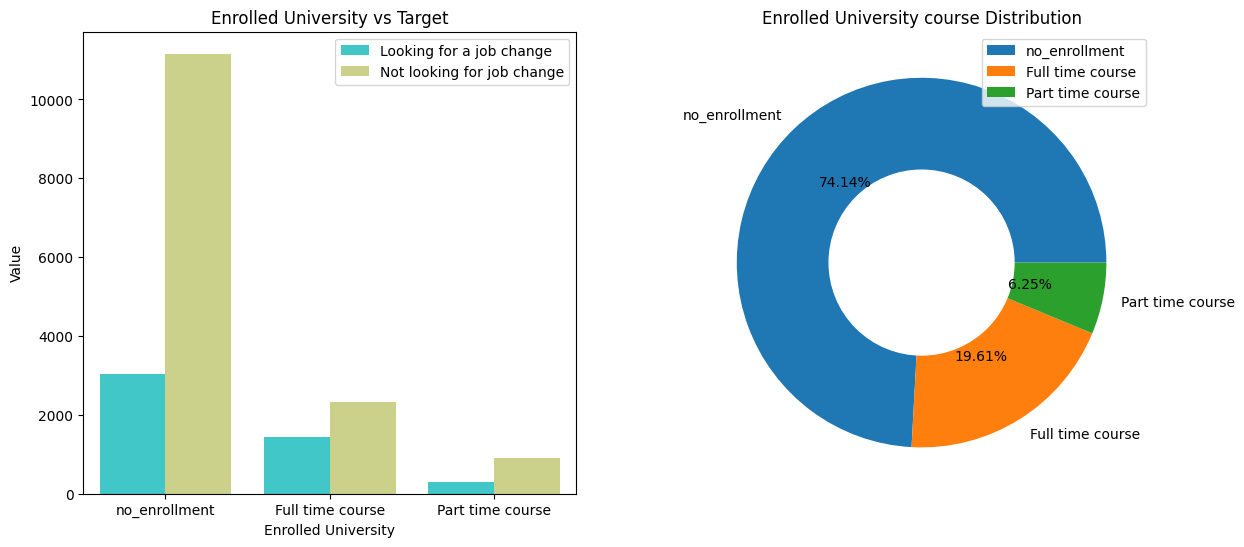

In [626]:
#enrollment vs hiring
plt.figure(figsize=(14, 6))

# Count plot for enrolled university vs target
plt.subplot(1, 2, 1)
ax = sns.countplot(x="enrolled_university", hue="target", data=df, palette="rainbow")
plt.xlabel('Enrolled University')
plt.ylabel('Value')
plt.title('Enrolled University vs Target')
plt.legend()

# Pie chart for enrolled university distribution
plt.subplot(1, 2, 2)
circle = plt.Circle((0, 0), 0.5, color="white")
plt.pie(university.values, labels=university.index, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Enrolled University course Distribution")
plt.legend()
plt.show()

#Remove Unessary column from data that has no impotance as per visualization

In [627]:
df.drop(['enrollee_id', 'city',], axis = 1, inplace=True)
df.shape

(19158, 12)

In [628]:
df.sample(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13085,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Medium-sized enterprises,Pvt Ltd,5,4,Not looking for job change
2482,0.897,Male,Has relevent experience,Part time course,PostGrad,STEM,6,Medium-sized enterprises,Pvt Ltd,1,44,Not looking for job change
3274,0.624,Male,Has relevent experience,no_enrollment,PostGrad,STEM,8,Large enterprises,Public Sector,1,5,Looking for a job change
6507,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,13,Medium-sized enterprises,Pvt Ltd,4,52,Looking for a job change
14506,0.897,Male,No relevent experience,no_enrollment,PostGrad,STEM,3,Medium-sized enterprises,Public Sector,5,96,Not looking for job change


In [629]:
# Inspect the data types
print(df.dtypes)

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                     object
dtype: object


In [630]:
df['target'].unique()

array(['Looking for a job change', 'Not looking for job change'],
      dtype=object)

In [631]:
target={
    'Not looking for job change':0,
    'Looking for a job change':1
}
df.loc[:,'target'] = df['target'].map(target)

In [632]:
df['target'].unique()

array([1, 0], dtype=object)

In [633]:
df['target'].value_counts()

,count
target,
0,14381
1,4777


In [634]:
df['target']=df['target'].astype(int)

##SAVE THE CLEANED DATASET

In [635]:
df.to_csv('cleaned_HR_data.csv', index=False)

##converting the categorical column to numerical column

In [636]:
#check the categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')


In [637]:
# Label Encoding for binary categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])

In [638]:
#check if any categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


##Data Correlation Plot

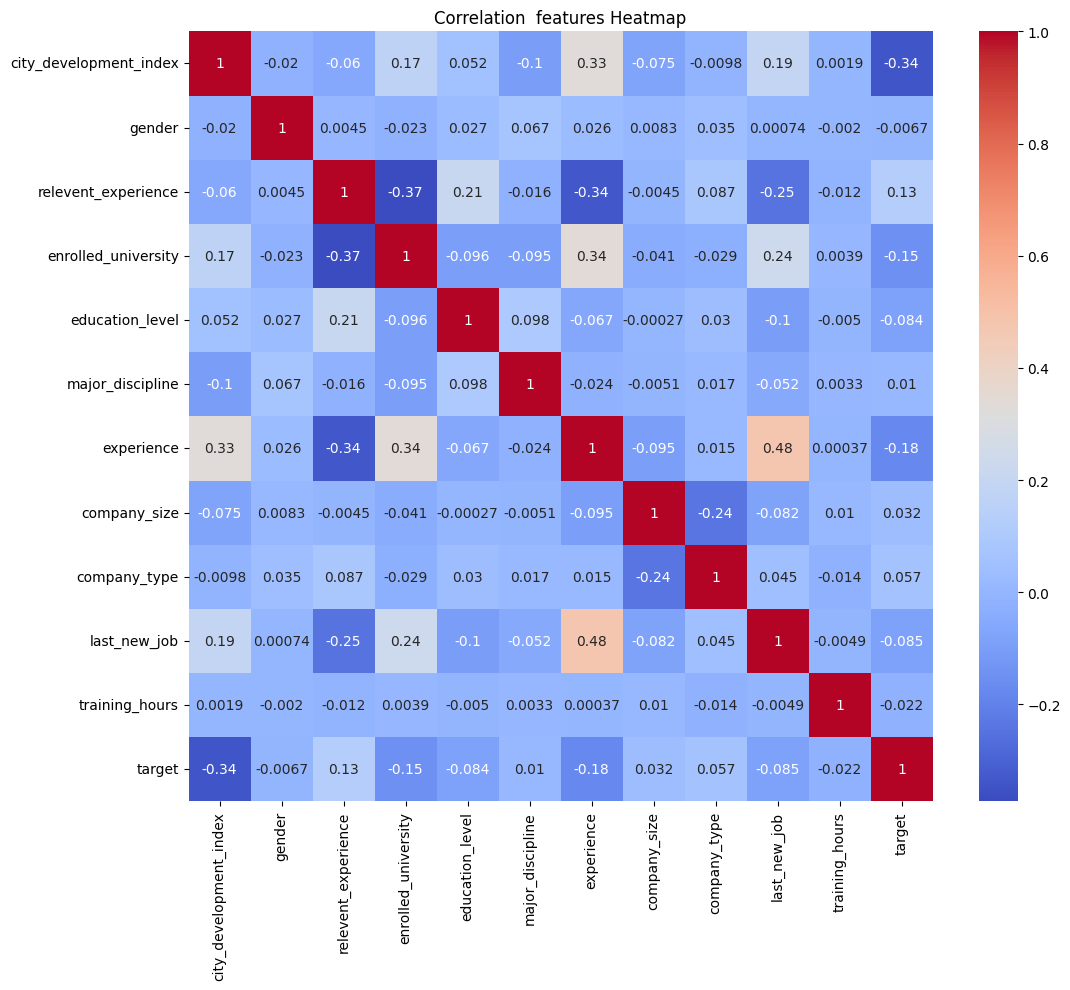

In [639]:
#corrrelation amoung the feature
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation  features Heatmap')
plt.show()

In [640]:
df.corr()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city_development_index,1.000000,-0.019808,-0.059808,0.165555,0.052468,-0.102510,0.334238,-0.075205,-0.009773,0.191410,0.001920,-0.341665
gender,-0.019808,1.000000,0.004455,-0.022702,0.026703,0.067138,0.026484,0.008307,0.035429,0.000741,-0.002013,-0.006733
relevent_experience,-0.059808,0.004455,1.000000,-0.372919,0.207864,-0.015727,-0.338764,-0.004500,0.087295,-0.247496,-0.011566,0.128430
enrolled_university,0.165555,-0.022702,-0.372919,1.000000,-0.096295,-0.095270,0.336866,-0.041129,-0.028769,0.237087,0.003943,-0.149539
education_level,0.052468,0.026703,0.207864,-0.096295,1.000000,0.098275,-0.067140,-0.000265,0.030096,-0.102861,-0.004978,-0.083729
major_discipline,-0.102510,0.067138,-0.015727,-0.095270,0.098275,1.000000,-0.023507,-0.005126,0.017177,-0.052140,0.003296,0.010221
experience,0.334238,0.026484,-0.338764,0.336866,-0.067140,-0.023507,1.000000,-0.094735,0.014799,0.477798,0.000369,-0.176898
company_size,-0.075205,0.008307,-0.004500,-0.041129,-0.000265,-0.005126,-0.094735,1.000000,-0.241808,-0.081744,0.010188,0.031588
company_type,-0.009773,0.035429,0.087295,-0.028769,0.030096,0.017177,0.014799,-0.241808,1.000000,0.045077,-0.013776,0.056685
last_new_job,0.191410,0.000741,-0.247496,0.237087,-0.102861,-0.052140,0.477798,-0.081744,0.045077,1.000000,-0.004949,-0.084607


#Important Feature With respect to Target

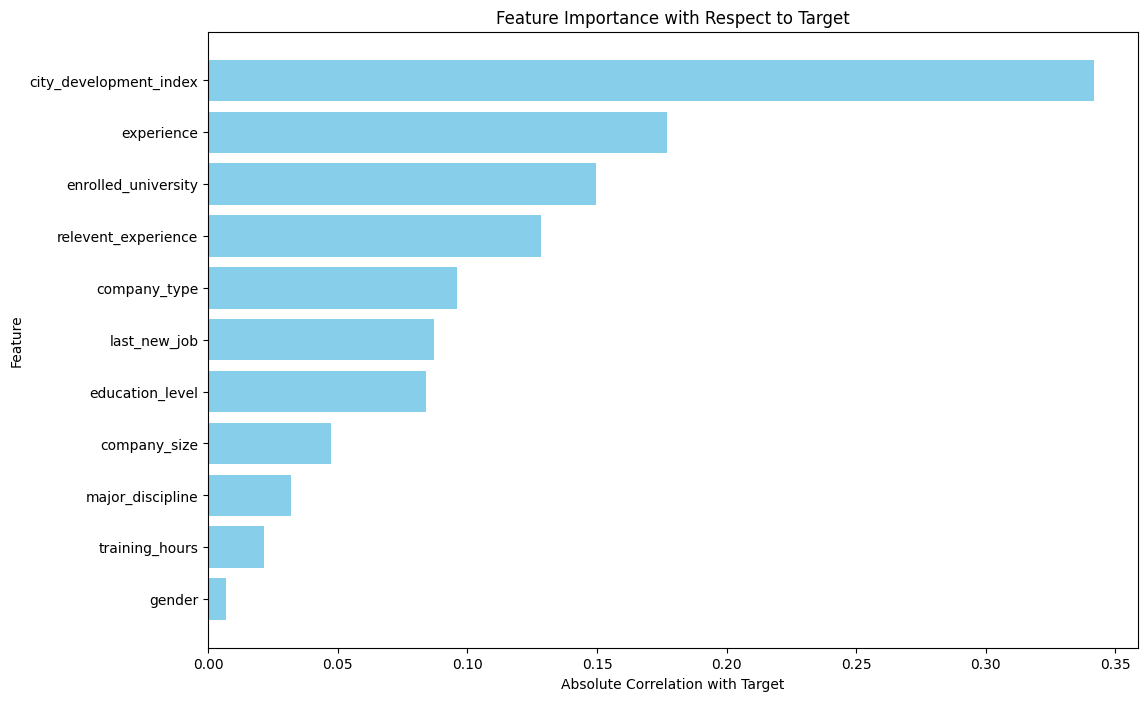

In [641]:
# Create a dictionary of features and their correlation with the target
feature_correlations = {
    'city_development_index': -0.341665,
    'gender': -0.006733,
    'relevent_experience': 0.128430,
    'enrolled_university': -0.149539,
    'education_level': -0.083908,
    'major_discipline': 0.031823,
    'experience': -0.176898,
    'company_size': 0.047362,
    'company_type': -0.096015,
    'last_new_job': -0.087113,
    'training_hours': -0.021577
}

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(list(feature_correlations.items()), columns=['Feature', 'Correlation'])

# Add a column with absolute correlation values
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(correlation_df['Feature'], correlation_df['Abs_Correlation'], color='skyblue')
plt.xlabel('Absolute Correlation with Target')
plt.ylabel('Feature')
plt.title('Feature Importance with Respect to Target')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()